In [1]:
import cv2
import os
from PIL import Image,ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Preprocessing

In [2]:
def preprocess_image(path):
    img = Image.open(path)
    dir_ = path.split('\\')
    filename = dir_[1]
    dir_ = dir_[0]
    # Enhance to get better Quality Image
    # Brightness, Contrast, Sharpness, Color
    
    #----Sharpness------------#
    enhancer = ImageEnhance.Sharpness(img)
    img = enhancer.enhance(2.0)
    
    #------Color-------------#
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(2.0)
    
    #------Brightness--------#
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(2.0)
    
    #------Contrast---------#
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.0)
    
    img.save(dir_ + '\\modified_'+filename)
    plt.figure(figsize = (5,5))
    plt.imshow(img)

In [3]:
PATH_TO_IMAGES_DIR = 'car_images'
IMAGE_PATHS = [ os.path.join(PATH_TO_IMAGES_DIR, 'view{}.jpeg'.format(i)) for i in range(1, 4) ]

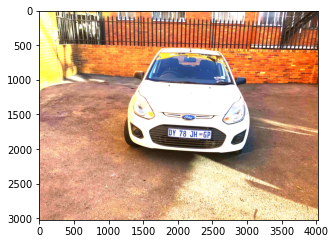

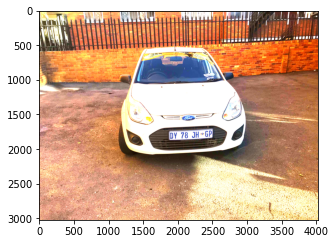

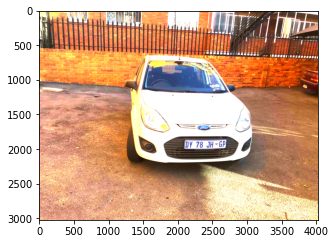

In [4]:
# Preprocessing Images
for img_path in IMAGE_PATHS:
    preprocess_image(img_path)

## Background Removal

In [5]:
%matplotlib inline

def background_removal(img_path):
    img = cv2.imread(img_path)
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    mask = np.zeros(img.shape[:2], np.uint8)

    bgdModel = np.zeros((1,65), np.float64)
    fgModel = np.zeros((1,65), np.float64)

    cv2.grabCut(img,mask,[900,400,2200,1700], bgdModel, fgModel, 5 , cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    image_rgb_nobg = img * mask2[:,:,np.newaxis]
    cv2.imwrite( 'NO_BACKGROUND\\'+img_path.split('\\')[1],image_rgb_nobg)
    plt.figure(figsize=(10,10))
    plt.imshow(image_rgb_nobg)

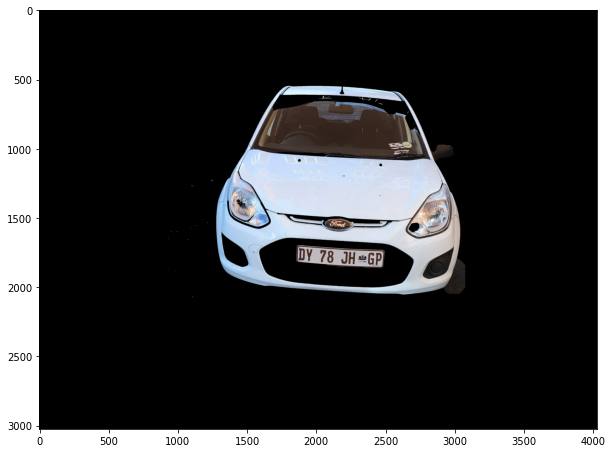

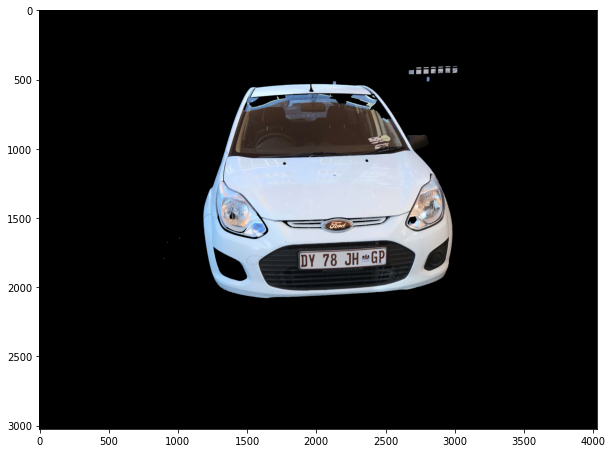

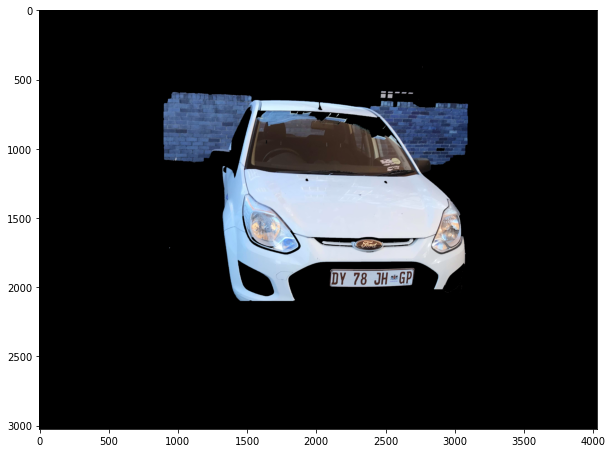

In [6]:
# BackGround Removal
PATH_TO_IMAGES_DIR = 'car_images'
IMAGE_PATHS = [ os.path.join(PATH_TO_IMAGES_DIR, 'view{}.jpeg'.format(i)) for i in range(1, 4) ]
IMAGE_PATHS
for path in IMAGE_PATHS:
    background_removal(path)

## Background Change

In [7]:
%matplotlib inline

def change_background(path,R=0,G=0,B=0):
    red = R
    green = G
    blue = B
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    trasn_mask = img[:,:,2]==0
    img[trasn_mask] = [red,green,blue]
    
    plt.imshow(img)
    

NO_BGD_IMAGE_PATHS = [ os.path.join('NO_BACKGROUND', 'view{}.jpeg'.format(i)) for i in range(1, 4) ]
NO_BGD_IMAGE_PATHS

['NO_BACKGROUND\\view1.jpeg',
 'NO_BACKGROUND\\view2.jpeg',
 'NO_BACKGROUND\\view3.jpeg']

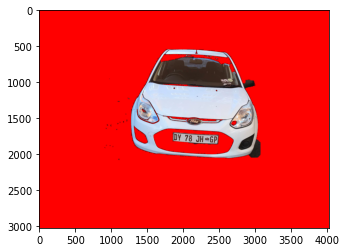

In [8]:
change_background(NO_BGD_IMAGE_PATHS[0],R=255)

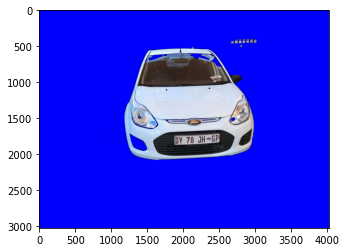

In [9]:
change_background(NO_BGD_IMAGE_PATHS[1],B=255)

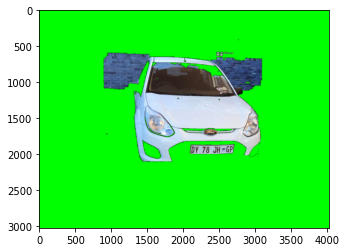

In [10]:
change_background(NO_BGD_IMAGE_PATHS[2],G=255)